In [1]:
# scipy.spatial.distance => count distance bettween 2 node
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [22]:
# giá trị trung bình của phân phối
means = [[2,2], [8,3], [3,6]]
# ma trận phương sai cho các cặp điểm
cov = [[1,0], [0,1]]
N = 500
# np.random.multivariate_normal sinh dữ liệu dựa trên phân phối chuẩn có means và cov
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# np.concatenate để chắp các vector 
X = np.concatenate((X0,X1,X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

[0 0 0 ... 2 2 2]


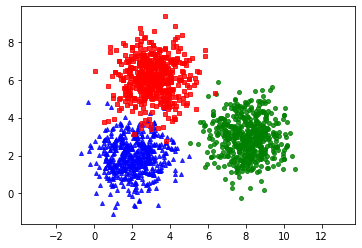

In [31]:
def kmeans_display(X, label):
    # return maximum value of array + 1
    K = np.amax(label) + 1
    X0 = X[label ==0, :]
    X1 = X[label ==1, :]
    X2 = X[label ==2, :]
    
    plt.plot(X0[:, 0],X0[:, 1],'b^', markersize = 4, alpha =.8)
    plt.plot(X1[:, 0],X1[:, 1],'go', markersize = 4, alpha =.8)
    plt.plot(X2[:, 0],X2[:, 1],'rs', markersize = 4, alpha =.8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [38]:
# kmeans_init_centers: khởi tạo các centers ban đầu
def kmeans_init_centers(X,k):
    #randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace = False)]

# kmeans_asign_labels: gán nhãn mới cho các điểm khi biết các centers
def kmeans_assign_labels(X,centers):
    # caculate pairwise distances btw data and centers
    D = cdist(X,centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# kmeans_updates_centers: cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K,X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# has_converged: kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [39]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[8.02890316 2.95538096]
 [3.06189745 6.14965918]
 [2.05758247 1.95297998]]


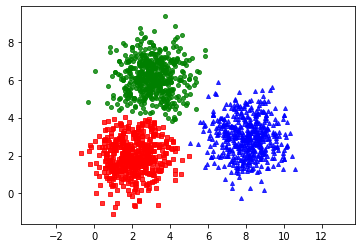

In [40]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

In [41]:
#-----------------------------------------------

# Using scikit-learn

Centers found by scikit-learn:
[[2.05758247 1.95297998]
 [8.02890316 2.95538096]
 [3.06189745 6.14965918]]


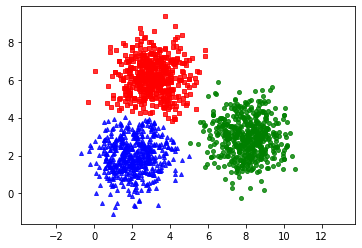

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)